#Hands on II Assignment AIT 664(DL3)

**Classification Models used for Prediction of House Prices in Chicago City**

**Siddhant Mehta G01455730**

# Importing the required libraries


In [196]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC


#Importing the datasetest and created a dataframe

In [197]:
#Importing the datasetest and created a dataframe
data_frame = pd.read_csv('Chicago_Housing.csv')

In [198]:
# TO check the uploaded data
data_frame.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [199]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


#Checking the Null values present in the dataset data_frame

In [200]:

data_frame.isnull().sum()

,0
Price,1
Bedroom,1
Space,11
Room,1
Lot,11
Tax,10
Bathroom,1
Garage,1
Condition,1


# Creating a new dataframe called new_df because any changes here won't affect the changes in the original uploaded datset data_frame

In [201]:

new_df = data_frame.copy()
new_df.head(160)

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


In [202]:
#Checking for Null Values
new_df.isnull().sum()

,0
Price,1
Bedroom,1
Space,11
Room,1
Lot,11
Tax,10
Bathroom,1
Garage,1
Condition,1


In [203]:
# This we used to drop the row with all the null values since it wont effect the model and its better for model classification.
new_df.drop(156)

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
151,42.0,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0


# Now for the remaining null values in the datset let's fill them with the mean value

In [204]:
new_df.fillna(new_df.mean(), inplace=True)

In [205]:
#Checking for Null values again
new_df.isnull().sum()

,0
Price,0
Bedroom,0
Space,0
Room,0
Lot,0
Tax,0
Bathroom,0
Garage,0
Condition,0


In [206]:
# Finding the median of the "Price" variable.
price_median = new_df['Price'].median()
price_median

55.0

In [207]:
# Now Let's categorize the Price variable into two groups based on median of the price.
new_df['Price_Catg_1'] = np.where(new_df['Price'] >= price_median, 1, 0)
print(new_df[['Price', 'Price_Catg_1']])

         Price  Price_Catg_1
0    53.000000             0
1    55.000000             1
2    56.000000             1
3    58.000000             1
4    64.000000             1
..         ...           ...
152  44.000000             0
153  43.000000             0
154  53.000000             0
155  62.000000             1
156  56.474359             1

[157 rows x 2 columns]


In [208]:
# Checking the distribution of Price_Catg_1
print(new_df['Price_Catg_1'].value_counts())

Price_Catg_1
1    85
0    72
Name: count, dtype: int64


In [209]:
# Let's check the correlation of our new target variable which is 'Price_Catg_1' with the other variables.
price_corr1 = new_df.corr() ['Price_Catg_1']
price_corr1_sorted = price_corr1.sort_values(ascending=False)
price_corr1_sorted

,Price_Catg_1
Price_Catg_1,1.000000
Price,0.804506
Tax,0.483007
Garage,0.460254
Space,0.442272
Bathroom,0.343013
Lot,0.332667
Room,0.322536
Bedroom,0.066804
Condition,-0.072579


In [210]:
# Now since Our target variable is Price_Catg_1 and we have divided the Price in to Price_Catg_1 we need to drop the Price variable as well
x= new_df.drop(['Price_Catg_1','Price'], axis = 1)
y = new_df['Price_Catg_1']
#split the train and Test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

#In this we trains and evaluates a logistic regression model for binary classification:

**Model Training:**

LOR_model.fit(x_train, y_train) trains the model on x_train and y_train.

**Prediction:**

y_pred = LOR_model.predict(x_test) uses the trained model to predict labels for x_test.

**Evaluation:**

**Accuracy:** The model's overall accuracy is 77%, meaning it correctly classifies 77% of the samples.

**Confusion Matrix:**  The matrix shows:

True Negatives (17) and True Positives (20) where the model correctly predicted each class.

False Positives (5) and False Negatives (6) represent misclassifications.

**Classification Report:**  Shows precision, recall, and F1-score for each class:

Class 0 has 74% precision and 77% recall.

Class 1 has 80% precision and 77% recall.

This evaluation highlights balanced performance, with slightly better precision for class 1. The model performs similarly for both classes, as indicated by the F1-scores around 0.77.

In [211]:
# Build a logistic regression model
LOR_model = LogisticRegression()
LOR_model.fit(x_train,y_train)
# for prediction
y_pred = LOR_model.predict(x_test)
# Evaluate the LoR_model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
# Display evaluation results
print(f'Accuracy: {accuracy:.2f}')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.77
Confusion Matrix:
 [[17  5]
 [ 6 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.76        22
           1       0.80      0.77      0.78        26

    accuracy                           0.77        48
   macro avg       0.77      0.77      0.77        48
weighted avg       0.77      0.77      0.77        48



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Operating Characteristic (ROC) Curve:**

The ROC curve plots the True Positive Rate (Sensitivity) against the False Positive Rate for various threshold values, giving an overview of the model's diagnostic ability.

**Area Under the Curve (AUC):**

The AUC score is 0.90, indicating excellent model performance. AUC values close to 1 imply that the model has a strong capability to distinguish between the positive and negative classes.

**Interpretation:**

With an AUC of 0.90, the model demonstrates a high probability of correctly ranking a randomly chosen positive instance higher than a randomly chosen negative one.

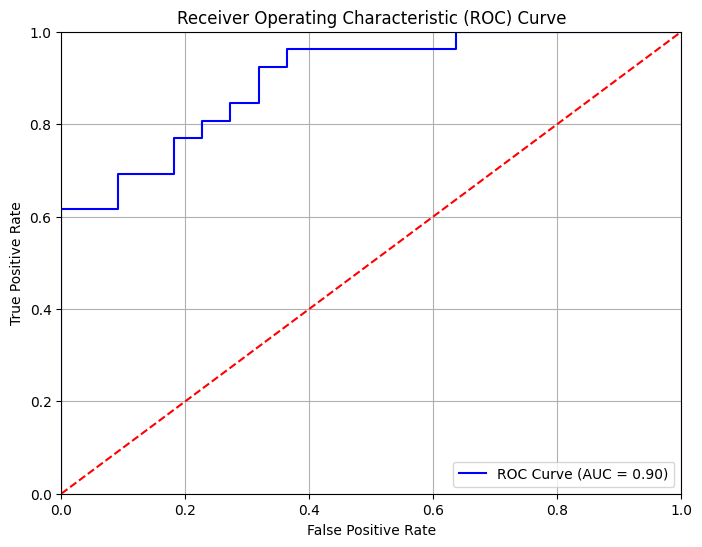

In [212]:
# Plotting and calculating the ROC and AUC curve
# Make predictions (probabilities) for the positive class
y_pred_prob = LOR_model.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


#In this we trains and evaluates a Decision Tree model for classification:

**Model Training:**

Decision_Tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42) initializes a Decision Tree model using entropy as the criterion and limits the tree depth to 3 to prevent overfitting.
 Decision_Tree_model.fit(x_train, y_train) trains the model on the training data.

**Prediction:**

y_pred = Decision_Tree_model.predict(x_test) generates predictions for x_test.

**Model Evaluation:**

**Accuracy**:

```
# This is formatted as code
```



 The model achieves an accuracy of 83%, correctly classifying 83% of the samples.

**Confusion Matrix**:

  True Negatives (19): Correctly predicted class 0.
  False Positives (3): Incorrectly predicted as class 1 instead of class 0.
  False Negatives (5): Incorrectly predicted as class 0 instead of class 1.
  True Positives (21): Correctly predicted class 1.

**Classification Report:**

 The report shows precision, recall, and F1-scores for each class:
  Class 0 has 79% precision and 86% recall.
  Class 1 has 88% precision and 81% recall.

This evaluation suggests that the model performs well for both classes, with balanced precision and recall, slightly favoring class 1 in precision. The F1-scores around 0.83 indicate strong, consistent performance across both classes.

In [213]:
#Decision Tree Model.
Decision_Tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
#fit the model
Decision_Tree_model.fit(x_train, y_train)
#for prediction
y_pred = Decision_Tree_model.predict(x_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.83
Confusion Matrix:
 [[19  3]
 [ 5 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.88      0.81      0.84        26

    accuracy                           0.83        48
   macro avg       0.83      0.84      0.83        48
weighted avg       0.84      0.83      0.83        48



**Interpretation**

The Decision Tree model demonstrates good discrimination between positive and negative classes, as indicated by the ROC curve's proximity to the top-left corner and the AUC value of 0.85, suggesting a high probability of correct classification.

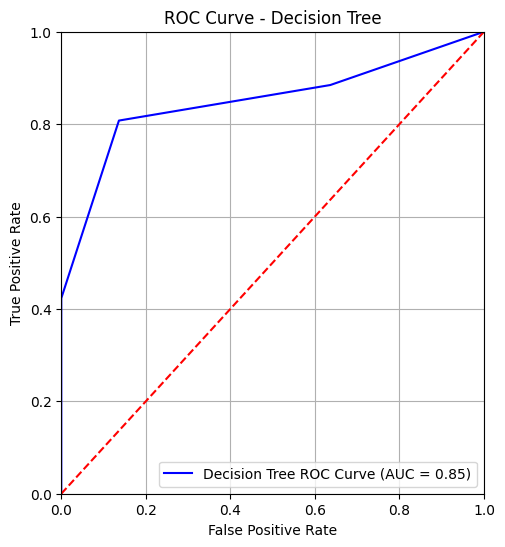

In [214]:
#Plotting and calculating the ROC and AUC curve
#Make prediction probablities for the positive class
y_pred_prob_dt = Decision_Tree_model.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)

# Calculate AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(12, 6))

# Plot for Decision Tree
plt.subplot(1, 2, 1)
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'Decision Tree ROC Curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid()

#In this we trains and evaluates a Support Vector Machine (SVM) classifier for binary classification:

**Model Initialization**:

SVM_model = SVC(kernel='linear', random_state=42, probability=True)creates an SVM model with a linear kernel and sets a random state for reproducibility.
 The probability=True parameter allows the model to output probability estimates for each class.

**Model Training**:

The model is trained on the training data using SVM_model.fit(x_train, y_train).

**Prediction**:

Predictions are made for the test set using y1_pred = SVM_model.predict(x_test).

**Evaluation**:


**Accuracy**: The model achieves an accuracy of 83%, indicating it correctly classifies 83% of the test samples.
**Confusion Matrix**:

**True Negatives (19)**: The model correctly identifies 19 instances of class 0.

**False Positives (3)**: The model incorrectly labels 3 instances as class 1.

**False Negatives (5)**: The model misses 5 instances of class 1, predicting them as class 0.

**True Positives (21)**: The model correctly identifies 21 instances of class 1.

**Classification Report**:

This report provides precision, recall, and F1-scores for each class:

Class 0 shows 79% precision and 86% recall.

Class 1 shows 88% precision and 81% recall.

The evaluation indicates that the SVM model performs effectively for both classes, with strong precision and recall metrics, slightly favoring class 1 in terms of precision. The F1-scores around 0.83 reflect consistent performance across both classes, similar to the Decision Tree model.

In [215]:
# Initialize the SVM classifier
SVM_model = SVC(kernel='linear', random_state=42, probability=True)

# Fit the model
SVM_model.fit(x_train, y_train)

# Make predictions
y1_pred = SVM_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.83
Confusion Matrix:
 [[19  3]
 [ 5 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.88      0.81      0.84        26

    accuracy                           0.83        48
   macro avg       0.83      0.84      0.83        48
weighted avg       0.84      0.83      0.83        48



**Intepretation**

The ROC curve for the SVM model indicates that it has good overall performance with an AUC of 0.90. The curve demonstrates how the model's performance varies at different classification thresholds, allowing for a trade-off between TPR and FPR

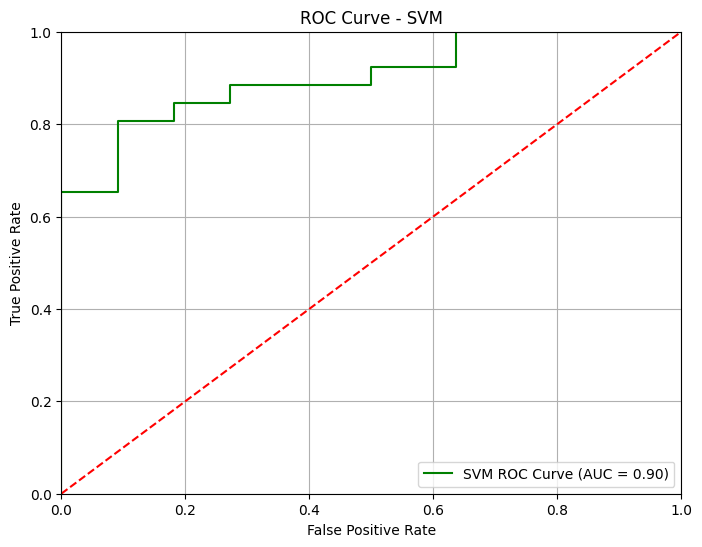

In [216]:
#Plotting and calculating the ROC and AUC curve
# Make predictions and get the predicted probabilities for the positive class
y_pred_prob_svm = SVM_model.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)

# Calculate AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='green', label=f'SVM ROC Curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Conclusion

**Logistic Regression Model**


Accuracy  is 0.77 and AUC = 0.90


**Decision Tree Classifier**

Accuracy is 0.83 and AUC = 0.85


**Suport Vector Machine Classifier(SVM)**

Accuracy is 0.83 and Auc = 0.90

**SVM is the best choice here due to its good accuracy and excellent AUC, indicating both reliable predictions and strong discrimination ability.**